<a href="https://colab.research.google.com/github/2303A51376/Natural-Language-Processing/blob/main/LAB4_1376.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/tweets.csv")

In [3]:
print(df.head())

   id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...       0  


In [4]:
label_counts = df['target'].value_counts()

/tmp/ipython-input-4079130810.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


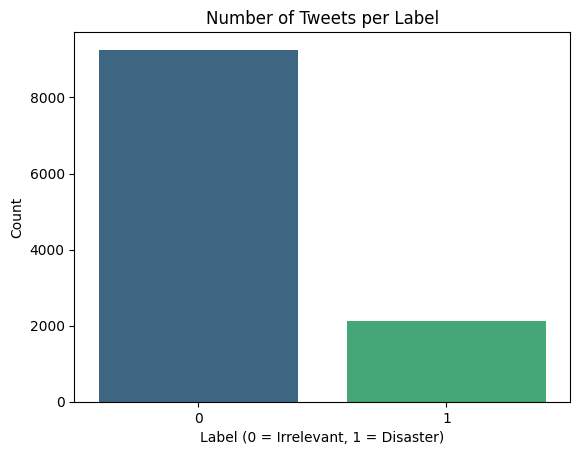

In [5]:
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title("Number of Tweets per Label")
plt.xlabel("Label (0 = Irrelevant, 1 = Disaster)")
plt.ylabel("Count")
plt.show()

In [6]:
irrelevant = df[df['target']==0]['text'].sample(5, random_state=42)
disaster   = df[df['target']==1]['text'].sample(5, random_state=42)

In [7]:
print("\nIrrelevant Tweets:\n", irrelevant.to_string(index=False))
print("\nDisaster Tweets:\n", disaster.to_string(index=False))


Irrelevant Tweets:
 s 1656ABAF :Battle ID I need backup! Lvl 100 Co...
The place where these children once called home...
i ordered one from @/wonu_hurricane ! good luck...
             IM DEVASTATED https://t.co/ynVGOzdjuS
forgive...Error...Iran...Vow...Punish...All...R...

Disaster Tweets:
 #StormBrendan Update-8.00 Tuesday.: Significant...
British politicians are quick to call Israel an...
1033) British Model Madalyn Davis dies in Sydne...
6-Alarm #Fire #BoundBrook #NewJersey Sun Massiv...
my fatass just tripped on some shit in my room ...


section-B

QUESTION-2

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


QUESTION-3

In [15]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

sample_texts = df['text'].sample(5)

comparison = []
for text in sample_texts:
    tokens = preprocess(text)
    stemmed = [ps.stem(w) for w in tokens]
    lemmatized = [lemmatizer.lemmatize(w) for w in tokens]
    comparison.append([text, " ".join(stemmed), " ".join(lemmatized)])

comp_df = pd.DataFrame(comparison, columns=['Original','Stemmed','Lemmatized'])
print(comp_df)

[nltk_data] Downloading package wordnet to /root/nltk_data...


                                            Original  \
0  A subtle design feature of the AR-15 rifle has...   
1  i put you first and you adored it set fires to...   
2  And also like, no stormy weather conditions? A...   
3  hes probably extremely traumatised too and wil...   
4  [Shang Tsung(MK2)] Kintaro Morph Fatality:(Hol...   

                                             Stemmed  \
0  subtl design featur rifl rais technic legal qu...   
1            put first ador set fire forest let burn   
2  also like stormi weather condit also thunderst...   
3  he probabl extrem traumatis never get think di...   
4  shang tsung kintaro morph fatal hold lp releas...   

                                          Lemmatized  
0  subtle design feature rifle raised technical l...  
1          put first adored set fire forest let burn  
2  also like stormy weather condition also thunde...  
3  he probably extremely traumatised never get th...  
4  shang tsung kintaro morph fatality hold lp rel..

SECTION-C QUESTION-4

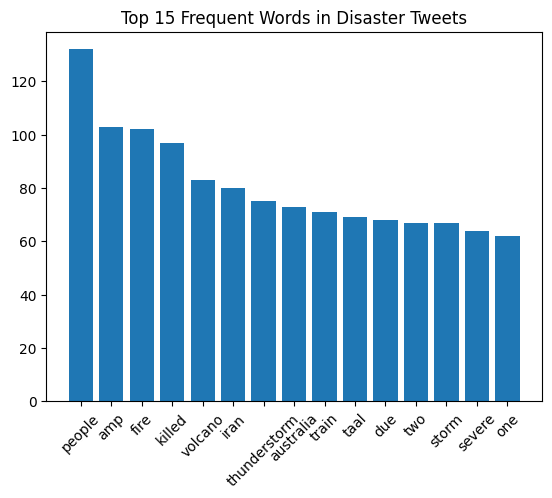

In [16]:
from collections import Counter

disaster_words = df[df['target']==1]['clean_tokens'].sum()
word_freq = Counter(disaster_words).most_common(15)

words, counts = zip(*word_freq)
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 15 Frequent Words in Disaster Tweets")
plt.show()


QUESTION-5

In [17]:
df['raw_length'] = df['text'].apply(lambda x: len(word_tokenize(x)))
df['clean_length'] = df['clean_tokens'].apply(len)

print("Average length before preprocessing:", df['raw_length'].mean())
print("Average length after preprocessing:", df['clean_length'].mean())


Average length before preprocessing: 20.775549692172383
Average length after preprocessing: 8.631310466138963


SECTION-D Q-6

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

df['clean_text'] = df['clean_tokens'].apply(lambda x: " ".join(x))

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])
y = df['target']


QUESTION-7

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1878
           1       0.87      0.38      0.53       396

    accuracy                           0.88      2274
   macro avg       0.88      0.68      0.73      2274
weighted avg       0.88      0.88      0.86      2274



QUESTION-8

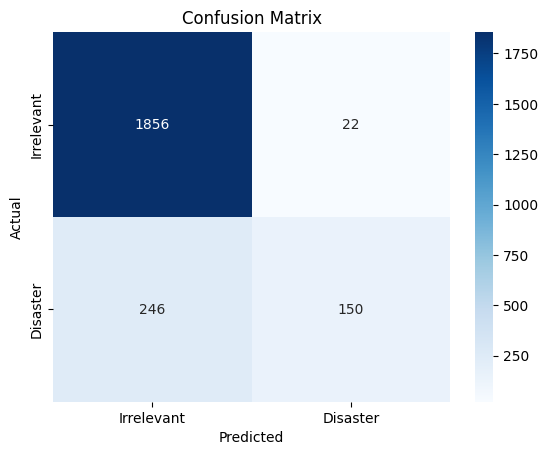

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Irrelevant','Disaster'], yticklabels=['Irrelevant','Disaster'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
